In [121]:
# Load dependencies
import scipy.sparse.linalg as spla
import scipy.sparse as sp
import numpy as np
import scipy.io
import time
from matplotlib import pyplot as plt
import ilupp

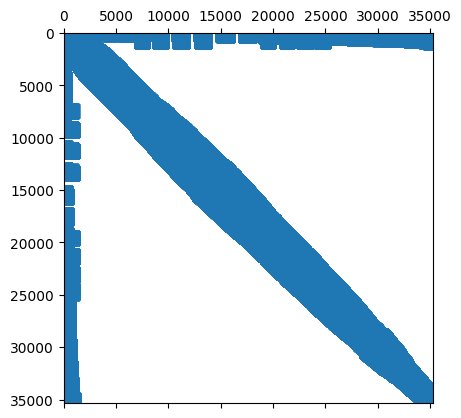

In [122]:
mat = scipy.io.loadmat('../data/cooling_flange.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

### Linear (sparse) Solver:

In [123]:
t = time.time()
x_ls = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x_ls-b)/np.linalg.norm(b)}")

Computation time linear solver: 8.48010778427124 seconds. Relative error: 3.692287916454645e-12


### Regular Conjugate Gradient:

In [124]:
relerror = 1e-4
t = time.time()
x_cg = spla.cg(A, b, tol = relerror)[0]
dt = time.time() - t
print(f"Computation time conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_cg-b)/np.linalg.norm(b)}")

Computation time conjugate gradient: 1.8958818912506104 seconds. Relative error: 9.670496748950777e-05


### PCG (M: diag)

In [125]:
M = sp.diags(A.diagonal()**(-1))
t = time.time()
x_pcg = spla.cg(A, b, tol = relerror, M = M)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcg-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 1.543018102645874 seconds. Relative error: 9.972538656486936e-05


### PCG (M: ichol)

In [129]:
M = ilupp.IChol0Preconditioner(sp.csr_matrix(A))
t = time.time()
x_pcg = spla.cg(A, b, tol = relerror, M = M)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcg-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 0.6089401245117188 seconds. Relative error: 8.9385901451212e-05


### Part c

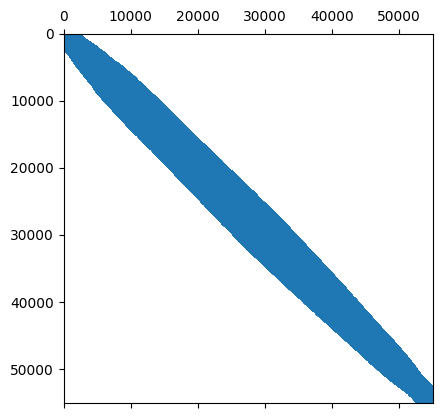

In [130]:
mat = scipy.io.loadmat('../data/convdiff.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

Construct preconditioner ilu:

In [154]:
M = ilupp.ILUTPreconditioner(sp.csr_matrix(A))

In [155]:
t = time.time()
x_gm = spla.gmres(A, b, tol = relerror, M=M)[0]
dt = time.time() - t
print(f"Computation time preconditioned gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm-b)/np.linalg.norm(b)}")
#Save to matlab file:
scipy.io.savemat('../data/x_gm.mat', {'x_gm':x_gm})
scipy.io.savemat('../data/b.mat', {'b':b})

Computation time preconditioned gmres: 7.20775294303894 seconds. Relative error: 8.853635587931572e-05


### Using the package "ilupp"

In [156]:
A = sp.csr_matrix(A)
t = time.time()
x_ilupp, info = ilupp.solve(A,b, info = True, rtol = relerror)
dt = time.time() - t
print(f"Computation time using ilupp: {dt} seconds. Relative error: {np.linalg.norm(A*x_ilupp-b)/np.linalg.norm(b)}")
print(f"ILUPP converged at {info[0]} iterations")

Computation time using ilupp: 1.1118311882019043 seconds. Relative error: 5.38362564257171e-07
ILUPP converged at 126 iterations
